In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import freqz
from myPDS import compute_and_plot_fft, LowPassFIR


In [3]:
sig_raw = np.loadtxt("raw_data.txt")

N = sig_raw.size
Fs = (N-1)/3.0


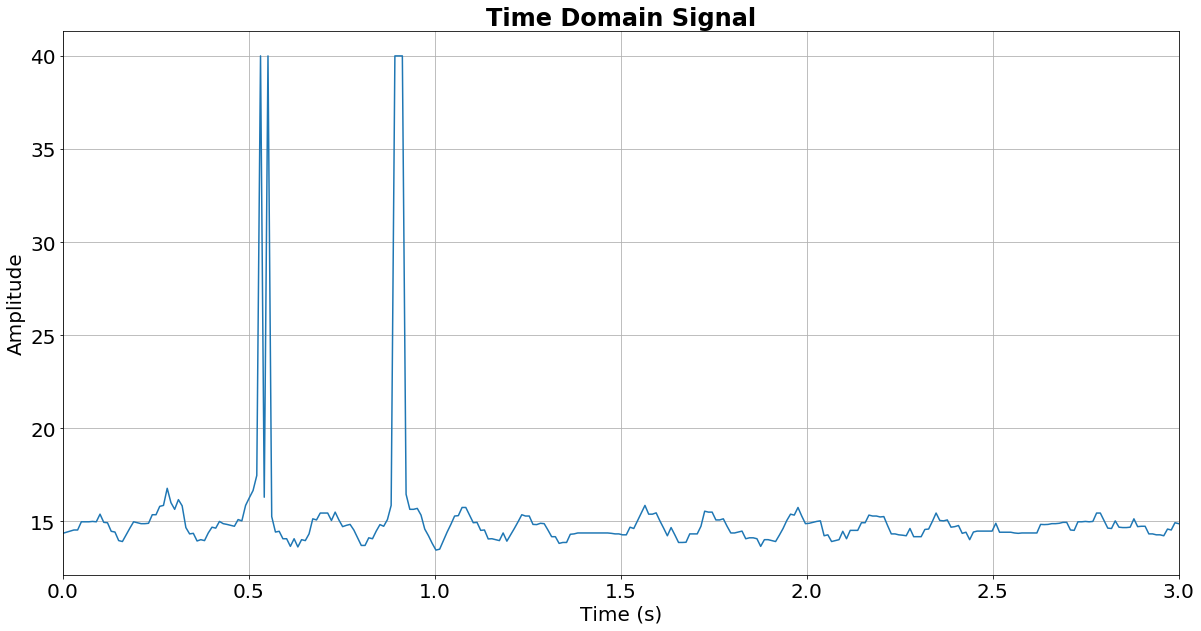

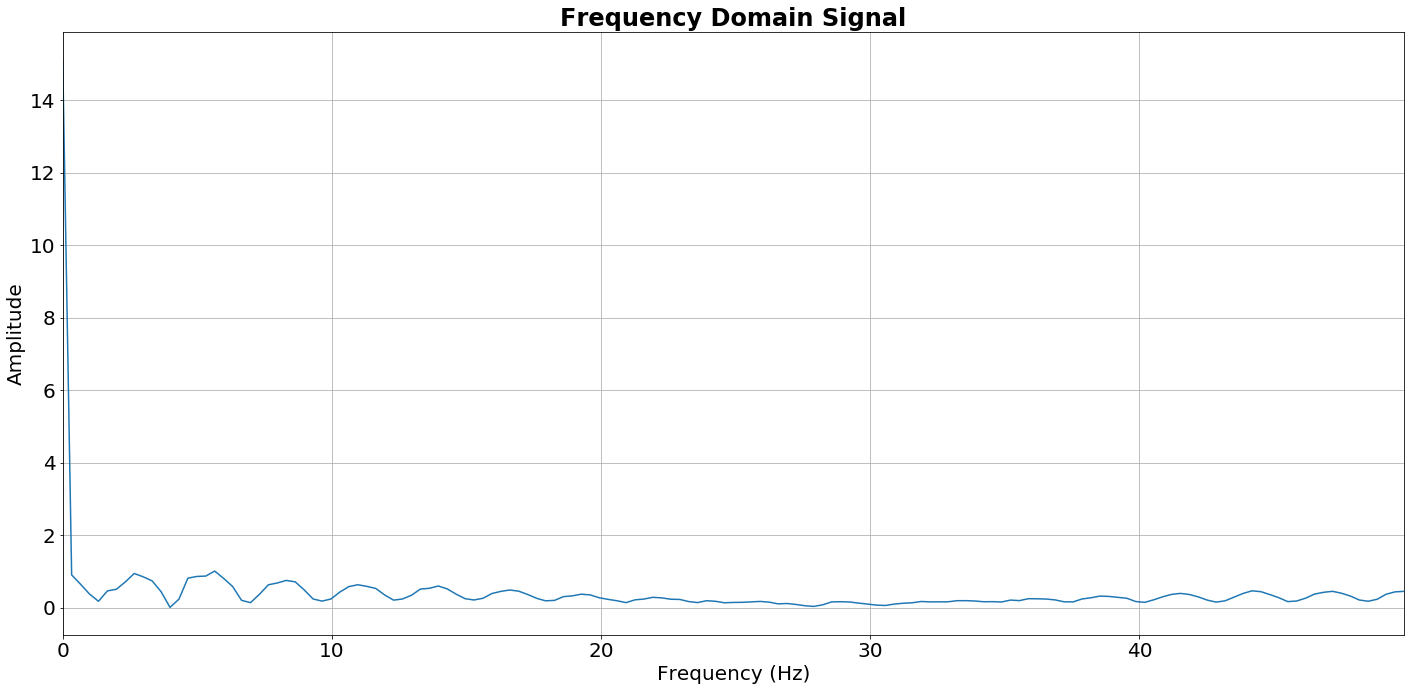

array([ 4.53682000e+03+0.00000000e+00j,  1.68994581e+01-1.34379459e+02j,
       -9.66662663e+01-6.80739640e+00j,  1.05929760e+01+5.53098125e+01j,
        5.02445175e+00-2.60568690e+01j, -5.12150872e+01+4.67513295e+01j,
        6.30046411e+01+4.27746693e+01j,  5.17039776e+01-9.30111925e+01j,
       -1.18661462e+02-7.69713338e+01j, -6.08201814e+01+1.12213536e+02j,
        9.78991491e+01+5.18788936e+01j,  3.26472981e+01-5.78561125e+01j,
       -1.11737401e+00+6.85960394e-02j,  3.19377575e+01-1.45899444e+01j,
       -2.25925696e+01-1.20030780e+02j, -1.13992635e+02+6.07189424e+01j,
        2.77464855e+01+1.27731464e+02j,  1.30706866e+02-7.65661354e+01j,
       -7.43166026e+01-9.54904233e+01j, -5.29208607e+01+7.00184162e+01j,
        1.98328663e+01+2.31637718e+01j, -1.45280795e+01-1.47391519e+01j,
       -5.42874465e+00+5.49189284e+01j,  9.40749085e+01-1.04089872e+01j,
       -1.45479243e+00-1.02147716e+02j, -1.12803380e+02-1.49183956e+00j,
        2.02156424e+00+1.06872885e+02j,  7.34696173

In [4]:
compute_and_plot_fft(sig_raw, Fs)

In [5]:
fir_lp = LowPassFIR(fc=1, transition_width=5, stopband_attenuation=40, passband_ripple=0.1, Fs=100)
b = fir_lp.getFilterCoeffs()


hanning


/tmp/ipykernel_26503/2703049875.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(b.T)
/home/senai/.local/lib/python3.8/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


63

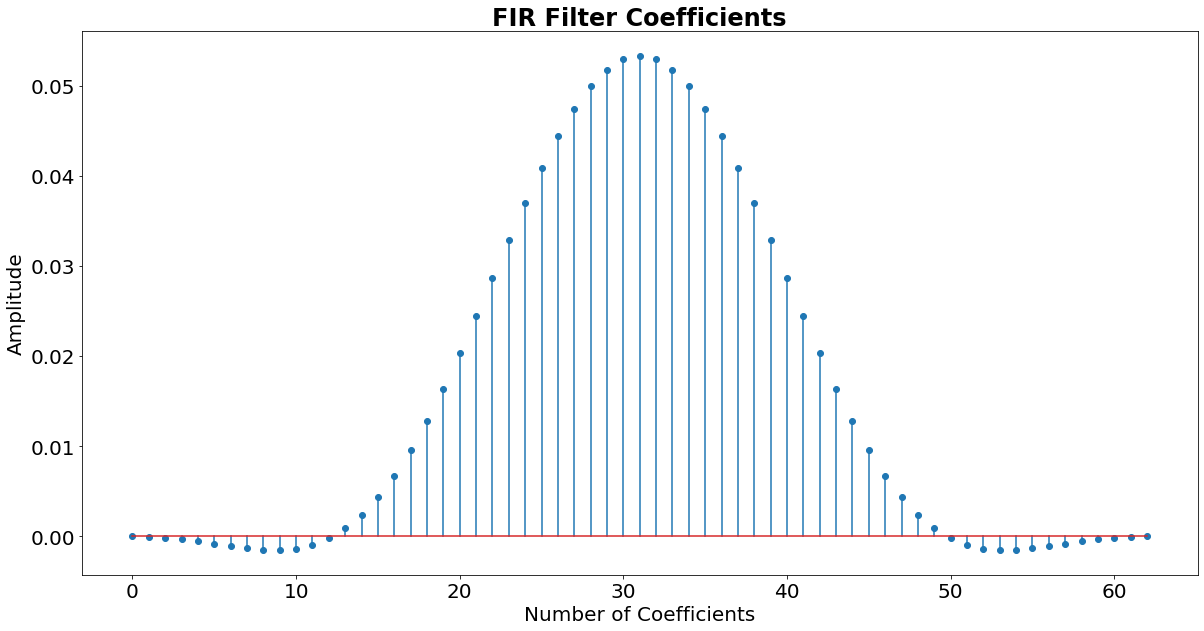

In [6]:
plt.figure(1, figsize=(20,10))
plt.title("FIR Filter Coefficients", fontweight="bold")
plt.xlabel("Number of Coefficients")
plt.ylabel("Amplitude")
plt.stem(b.T)
print(fir_lp.getWindow())
b.size

In [7]:
sig_raw = sig_raw.reshape(sig_raw.size)
b = b.reshape(b.size)

y = np.convolve(sig_raw, b)


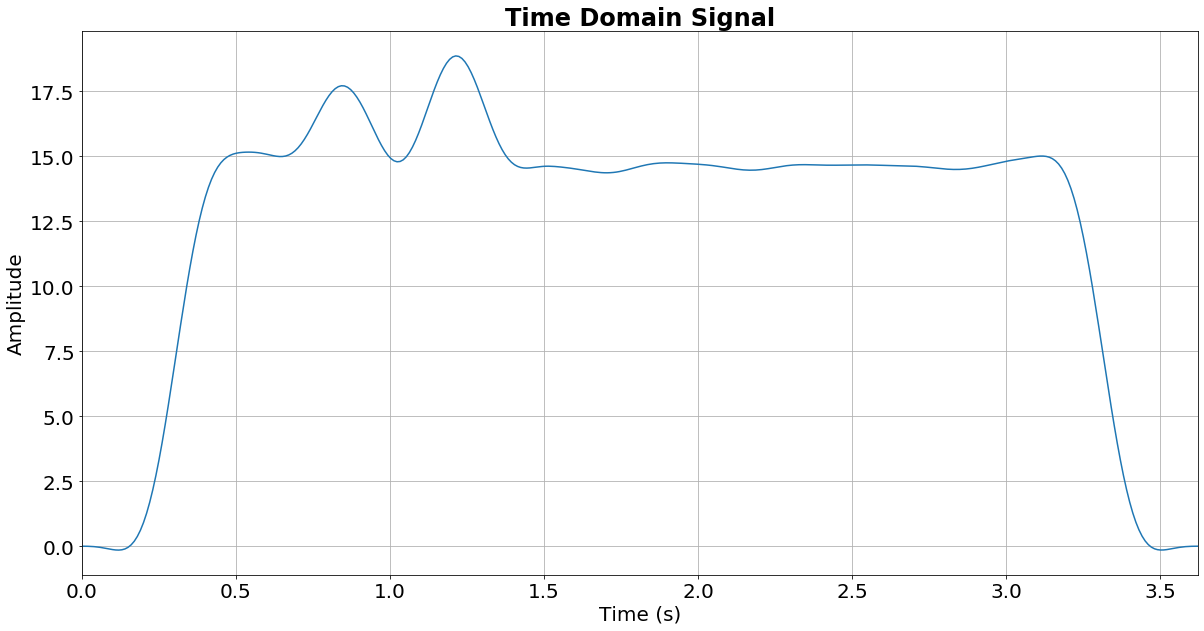

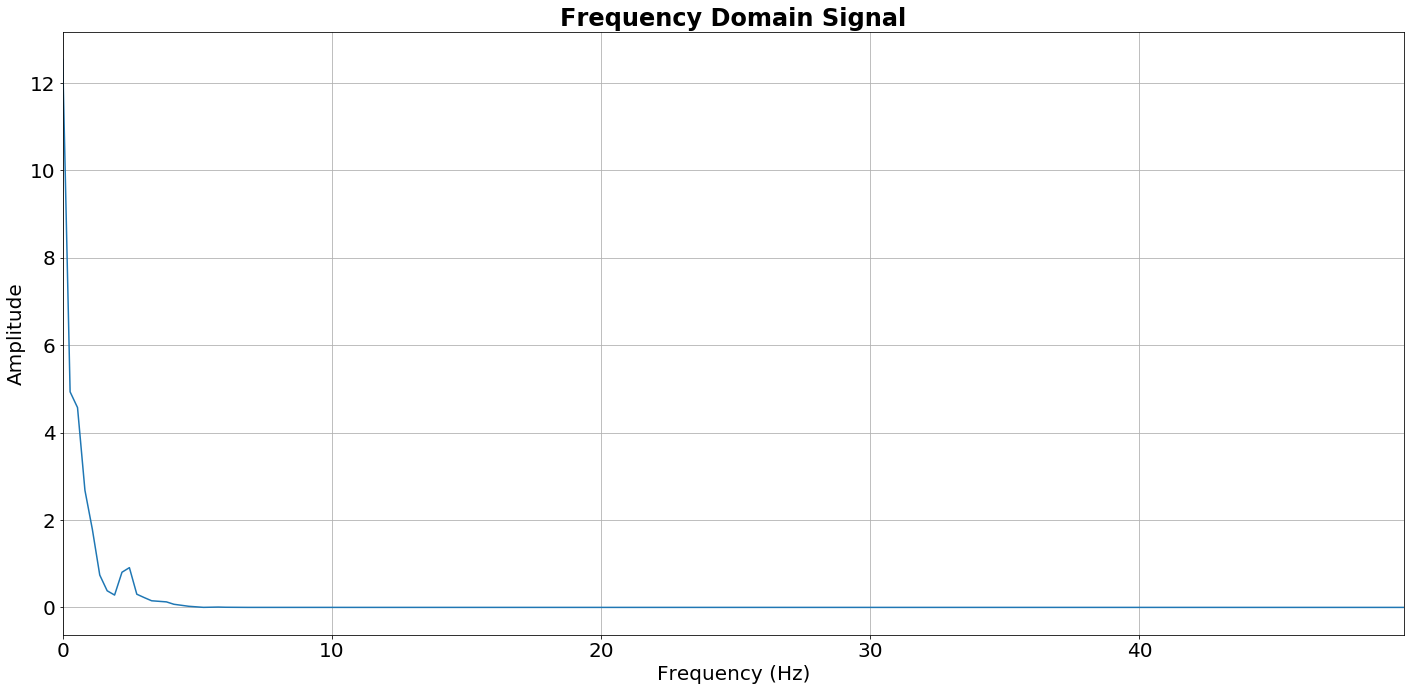

array([ 4.53938894e+03-3.77475828e-14j, -8.81358539e+02-1.42079291e+02j,
       -8.26824157e+02+3.70128364e+01j, -4.83477719e+02+3.91473585e+01j,
       -3.19996722e+02-4.84073256e+01j, -1.32697441e+02+1.88708018e+01j,
        5.85563103e+01-3.62346366e+01j,  5.08014936e+01-5.46125991e+00j,
        1.25260559e+02+7.43107491e+01j,  1.64485898e+02-7.64988506e+00j,
        2.21880552e+01-4.99160556e+01j, -1.04649403e+01+3.93211996e+01j,
        2.43294387e+01+1.27140636e+01j, -1.60725642e+01-1.95953826e+01j,
       -2.28211236e+01-1.17925223e+00j, -1.25449840e+01-3.32014019e+00j,
       -8.58134251e+00-1.41705287e+00j, -5.94447828e-01+4.59225897e+00j,
        1.99639817e+00-1.11600631e+00j, -1.87437337e-02-1.66557538e-01j,
       -2.77546636e-03-6.65062273e-01j, -1.38665712e+00-7.56953055e-02j,
       -7.14057508e-02+5.85455758e-01j,  1.43032632e-01-2.22767283e-01j,
       -3.39800144e-03-1.62997765e-02j, -4.40635101e-02-2.01602105e-02j,
       -7.38149438e-02+3.51570886e-02j, -2.17049501

In [8]:
compute_and_plot_fft(y, Fs)

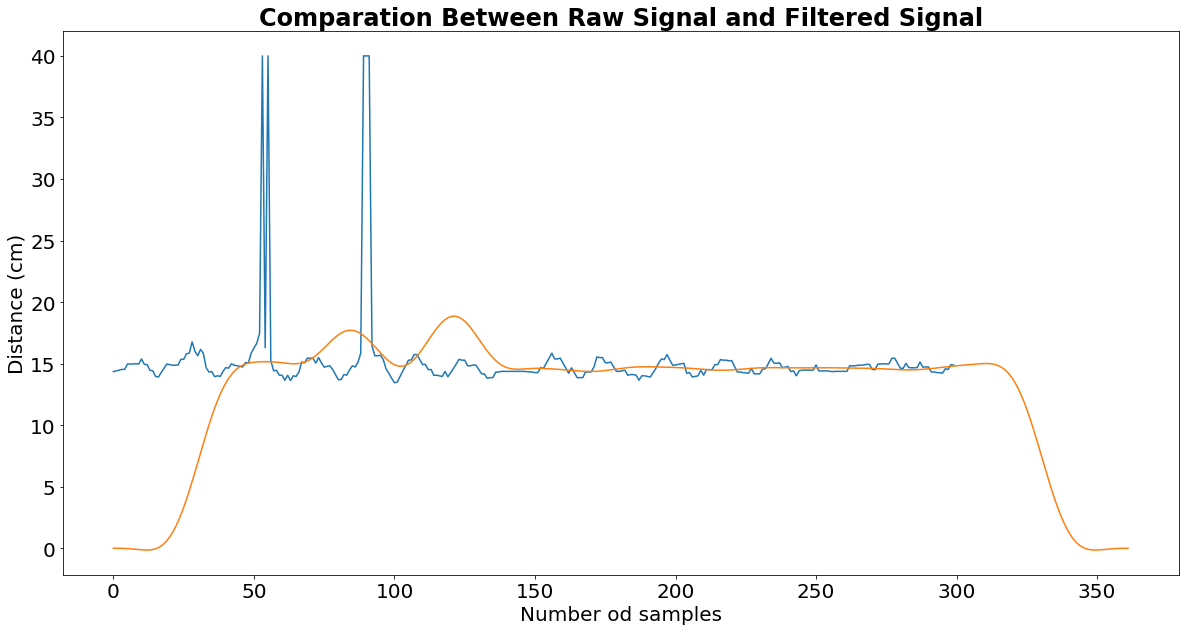

In [9]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y)

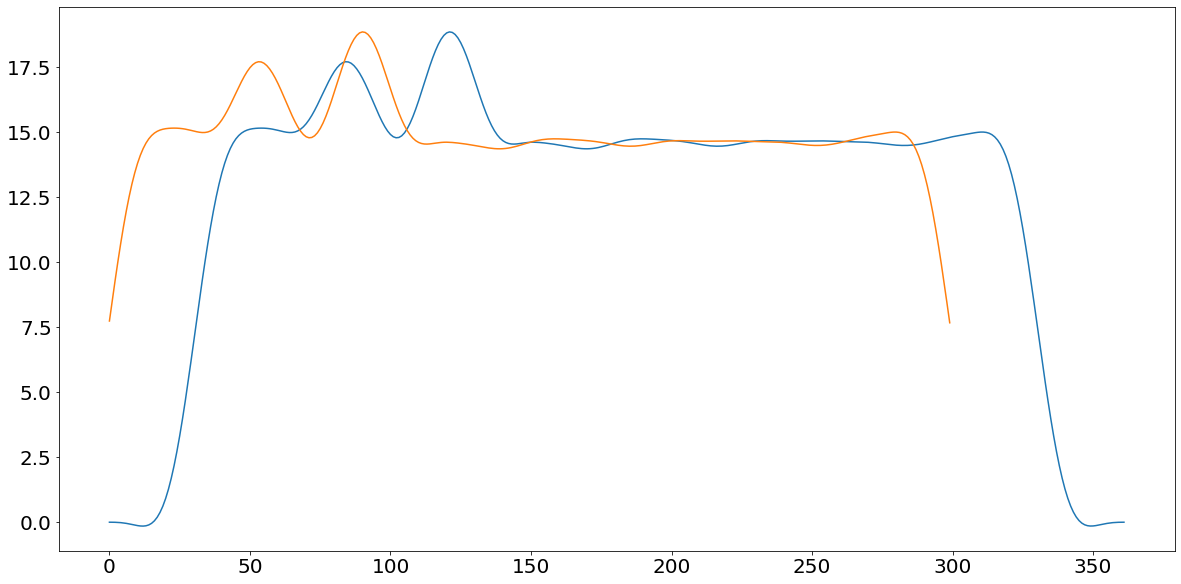

In [10]:
y1 = y[int(b.size/2):-int(b.size/2)]
plt.figure(1, figsize=(20,10))
plt.plot(y)
plt.plot(y1)

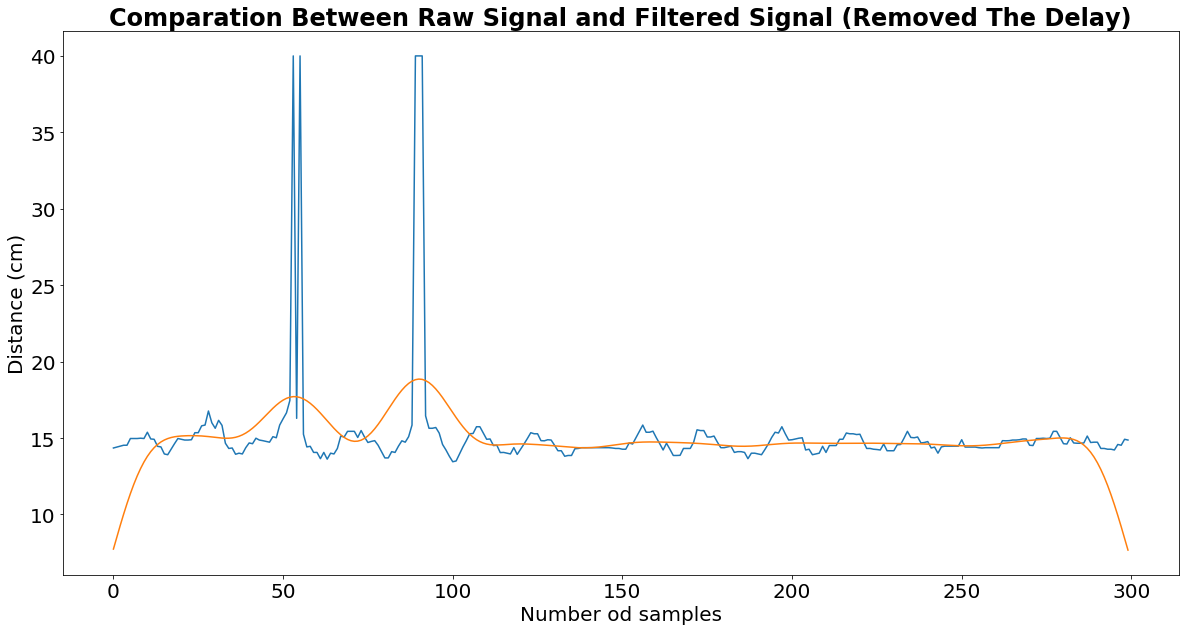

In [11]:
plt.figure(1, figsize=(20,10))
plt.title("Comparation Between Raw Signal and Filtered Signal (Removed The Delay)", fontweight="bold")
plt.xlabel("Number od samples")
plt.ylabel("Distance (cm)")
plt.plot(sig_raw)
plt.plot(y1)

In [12]:
from os.path import isfile
from os import remove

if isfile("filter_coeffs.txt"):
  remove("filter_coeffs.txt")

with open("filter_coeffs.txt", "a") as file:
  for coeff in b:
    file.write(str(coeff)+'\n')
  file.close()



In [13]:
max(y)

18.858182857688224

In [14]:
wf, hf = freqz(b.T, 1, worN=1024, fs=Fs)


Text(0.5, 1.0, 'Frequency Response')

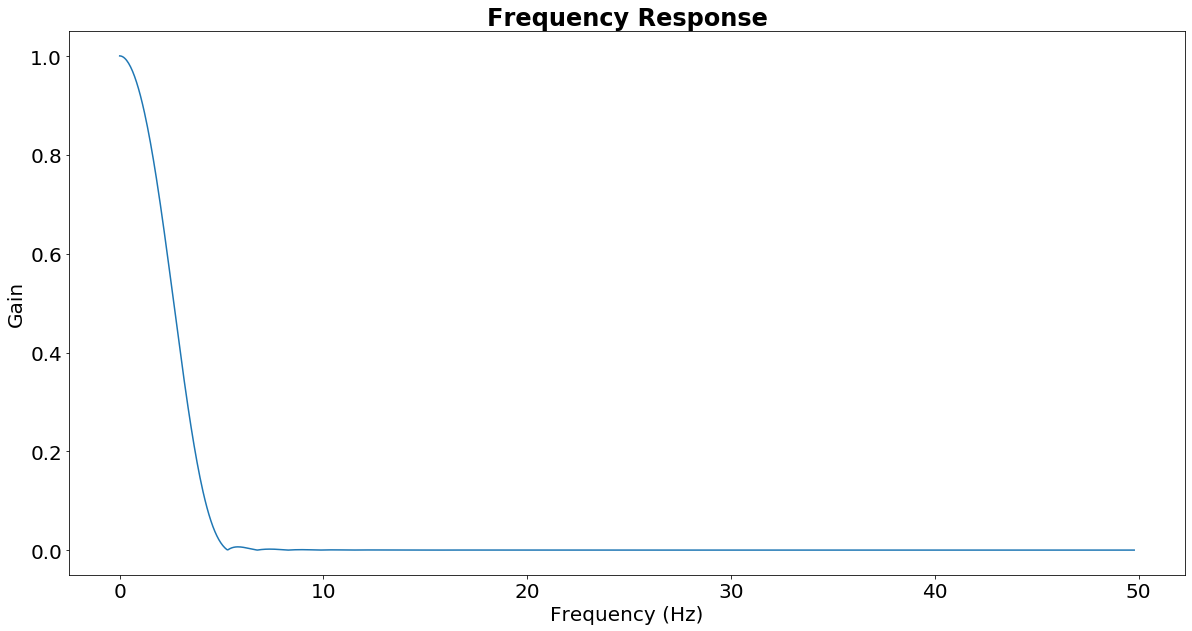

In [15]:
plt.figure(1, figsize=(20,10))
plt.plot(wf, np.absolute(hf))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain")
plt.title("Frequency Response", fontweight="bold")


Text(0.5, 1.0, 'Frequency Response')

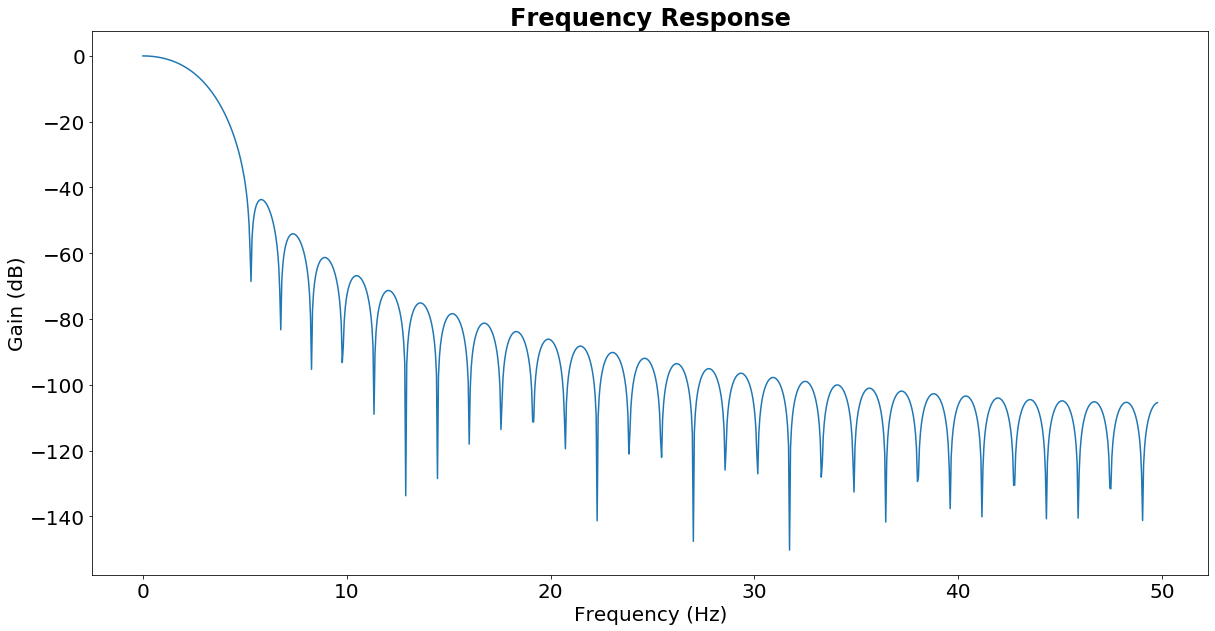

In [16]:
# Plotagem em dB
plt.figure(1, figsize=(20,10))
plt.plot(wf, 20*np.log10(np.absolute(hf)))
plt.xlabel("Frequency (Hz)")
plt.ylabel("Gain (dB)")
plt.title("Frequency Response", fontweight="bold")

63.0